In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os.path



In [2]:
# Get filepaths and labels

image_dir = Path("../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset")
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name = 'Filepath').astype(str)
labels = pd.Series(labels, name = 'Label')

In [3]:
# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis = 1)
image_df

,Filepath,Label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
...,...,...
17995,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
17996,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
17997,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
17998,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT


In [4]:
image_df['Label'].value_counts()

Hourse Mackerel          1000
Hourse Mackerel GT       1000
Red Sea Bream            1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Shrimp                   1000
Shrimp GT                1000
Striped Red Mullet       1000
Striped Red Mullet GT    1000
Trout GT                 1000
Trout                    1000
Red Mullet GT            1000
Red Mullet               1000
Sea Bass GT              1000
Sea Bass                 1000
Black Sea Sprat          1000
Black Sea Sprat GT       1000
Red Sea Bream GT         1000
Name: Label, dtype: int64

In [5]:
# Drop GT images

image_df['Label'] = image_df['Label'].apply(lambda x: np.NaN if x[-2:] == 'GT' else x)
image_df = image_df.dropna(axis=0)

In [6]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  9000 non-null   object
 1   Label     9000 non-null   object
dtypes: object(2)
memory usage: 210.9+ KB


In [7]:
image_df['Label'].value_counts()

Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: Label, dtype: int64

# Let  try plot the 1 sample image from each category

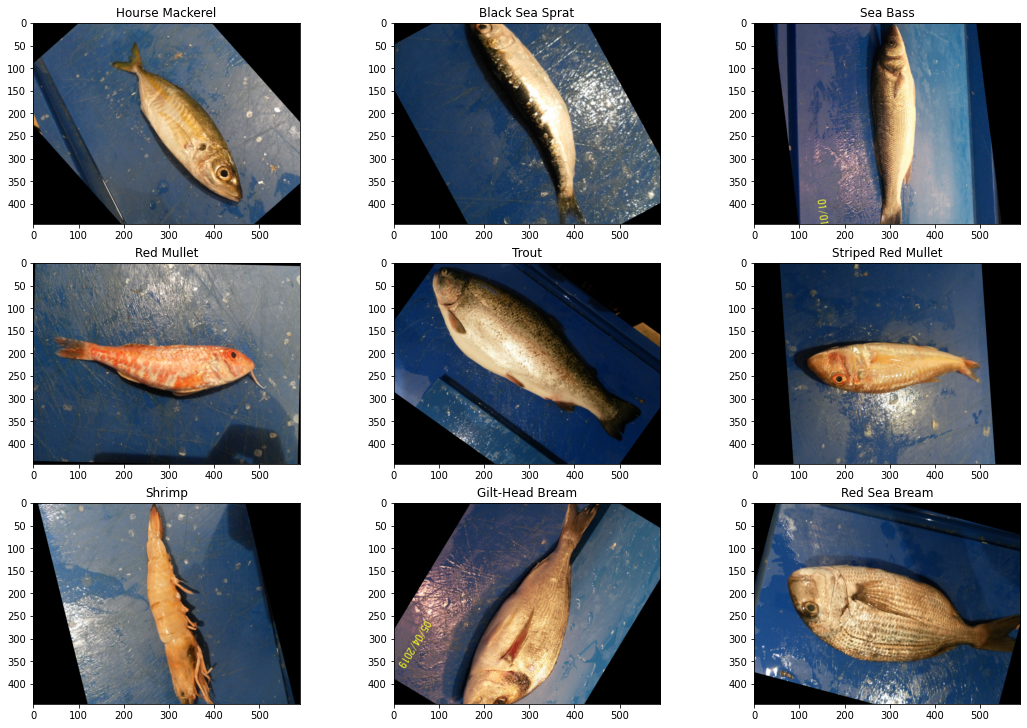

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), constrained_layout=True)
ax=ax.flatten()
j=0
for i in image_df['Label'].unique():
    
    ax[j].imshow(plt.imread(image_df[image_df['Label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(image_df, test_size=0.3,random_state=30)

In [10]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)

Shape of training data (6300, 2)
Shape of test data (2700, 2)


# Creating the image dataset using Tensorflow

In [11]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import preprocess_input

In [12]:
trainGen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    validation_split=0.3)


testGen =ImageDataGenerator(
    preprocessing_function= preprocess_input)

In [13]:
train_img = trainGen.flow_from_dataframe(
    dataframe=x_train, 
    x_col='Filepath', 
    y_col='Label', 
    target_size=(200,200), 
    color_mode='rgb', 
    class_mode='categorical',
    subset='training',
    batch_size=32,
    shuffle=False
)

val_img = trainGen.flow_from_dataframe(
    dataframe=x_train, 
    x_col='Filepath', 
    y_col='Label', 
    target_size=(200,200), 
    color_mode='rgb', 
    class_mode='categorical',
    subset='validation',
    batch_size=32,
    shuffle=False
)

test_img = testGen.flow_from_dataframe(
    dataframe=x_test, 
    x_col='Filepath', 
    y_col='Label', 
    target_size=(200,200), 
    color_mode='rgb', 
    class_mode='categorical', 
    batch_size=32,
    shuffle=False
)



Found 4410 validated image filenames belonging to 9 classes.
Found 1890 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.


# **Plotting image after preprocessing**

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


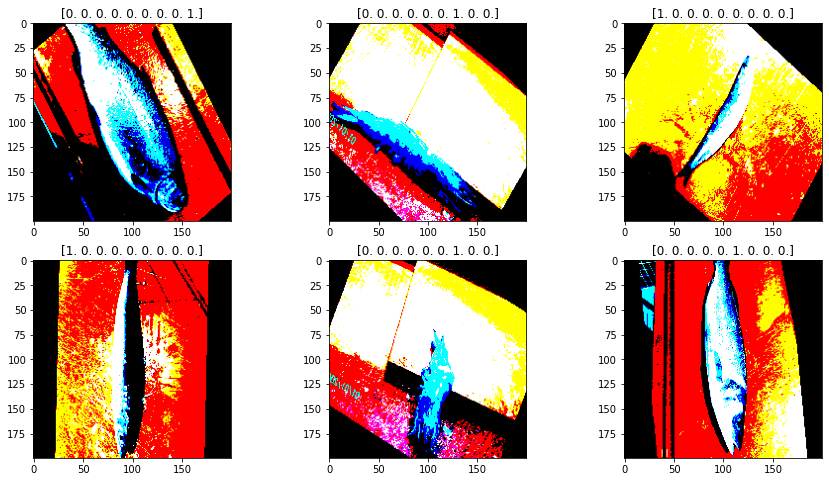

In [14]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_img.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [15]:
# here we define the model

input_shape = (200, 200, 3)



In [16]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

# The CNN layer

In [17]:

model = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
           
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
           
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
           
    Dense(128, activation='relu'),
    Dropout(0.2),
           
    Dense(9, activation='sigmoid')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9

2022-11-21 10:17:16.532655: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=["accuracy"]
)

In [20]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    patience=4, 
    mode = "min", 
    restore_best_weights=True
)

In [21]:
history = model.fit(
    train_img, 
    validation_data=val_img, 
    epochs=20, 
    callbacks=[
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )]
)

2022-11-21 10:17:18.035499: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
138/138 [==============================] - 276s 2s/step - loss: 2.1177 - accuracy: 0.2887 - val_loss: 1.2598 - val_accuracy: 0.5312
Epoch 2/20
138/138 [==============================] - 250s 2s/step - loss: 1.0209 - accuracy: 0.6374 - val_loss: 0.6478 - val_accuracy: 0.7772
Epoch 3/20
138/138 [==============================] - 240s 2s/step - loss: 0.5989 - accuracy: 0.7977 - val_loss: 0.5806 - val_accuracy: 0.8143
Epoch 4/20
138/138 [==============================] - 242s 2s/step - loss: 0.3566 - accuracy: 0.8825 - val_loss: 0.4152 - val_accuracy: 0.8603
Epoch 5/20
138/138 [==============================] - 245s 2s/step - loss: 0.2686 - accuracy: 0.9120 - val_loss: 0.3389 - val_accuracy: 0.8931
Epoch 6/20
138/138 [==============================] - 241s 2s/step - loss: 0.2227 - accuracy: 0.9272 - val_loss: 0.3163 - val_accuracy: 0.8952
Epoch 7/20
138/138 [==============================] - 240s 2s/step - loss: 0.1401 - accuracy: 0.9553 - val_loss: 0.3321 - val_accuracy: 0.9011

In [22]:
train_result = model.evaluate(train_img,verbose=0)

print("Train Accuracy:{:.2f}%".format(train_result[1]*100))

print("Train Loss:{:.5f}".format(train_result[0]))

Train Accuracy:98.57%
Train Loss:0.04360


In [38]:
val_result = model.evaluate(val_img,verbose=0)

print("Validation Accuracy:{:.2f}%".format(val_result[1]*100))

print("Validation Loss:{:.5f}".format(val_result[0]))

Validation Accuracy:93.12%
Validation Loss:0.25364


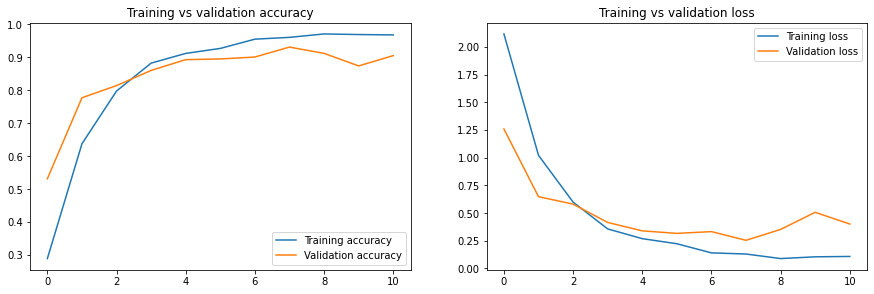

In [34]:
train_accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(train_accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(train_loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [31]:
test_result = model.evaluate(test_img,verbose=0)

print("Test Accuracy:{:.2f}%".format(test_result[1]*100))

print("Test Loss:{:.5f}".format(test_result[0]))

Test Accuracy:92.44%
Test Loss:0.24976
